# (Covid19 Investigation)
## by (Junko Omata)

## Investigation Overview

> Would like to investigate on what variant is actively affecting new_cases, and possibly what element is saving us ... from wide spread of new_cases numbers and ultimately deaths_numbers

### new_cases numbers vs people_fully_vaccinated_per_hundred  ---> is vaccine suppressing new cases?

>people_fully_vaccinated_per_hundred is effectively percentage value, so I use this as to understand vaccine coverage ratio

>Intresting to see the relationship of new_cases_per_million vs total_deaths_per_million

>Also intresting to see any of sociological and medical variables have any affect on new_cases numbers, e.g. population_density, median_age, gdp_capital, hospital_beds_per_thousand, cardiovasc_death_rate, diabetes_prevalance


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_covid =pd.read_csv('covid-19-world-cases-deaths-testing.csv')

df_covid['location'].value_counts()
df_covid.query('location == "Peru"')
# Peru has most data entries, may be not surprising
df_covid.info()
df_covid['ndate'] = pd.to_datetime(df_covid['date'])
df_thisyear = df_covid.query('ndate >= "2021-01-01"')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121017 entries, 0 to 121016
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121017 non-null  object 
 1   continent                                115502 non-null  object 
 2   location                                 121017 non-null  object 
 3   date                                     121017 non-null  object 
 4   total_cases                              114912 non-null  float64
 5   new_cases                                114909 non-null  float64
 6   new_cases_smoothed                       113894 non-null  float64
 7   total_deaths                             104123 non-null  float64
 8   new_deaths                               104278 non-null  float64
 9   new_deaths_smoothed                      113894 non-null  float64
 10  total_cases_per_million         

## what is going on world wide 2021?

First checking on new_cases_per_million for this year and last year

Is there any seasonal trend?

Is it currently going down in new cases?


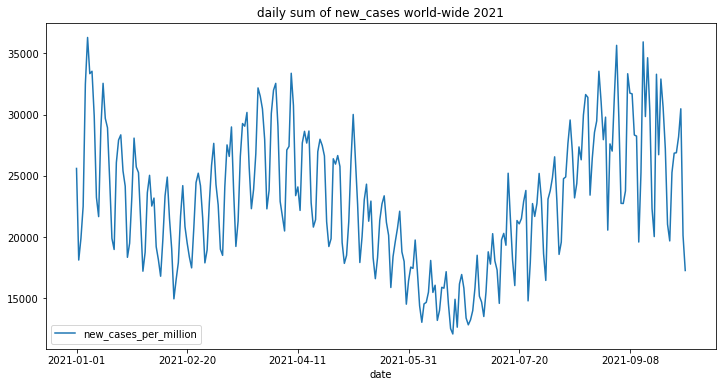

In [3]:
df_bydate=df_thisyear.groupby('date')[['date','new_cases_per_million']].sum()

myplot = df_bydate.plot(kind='line');
plt.title('daily sum of new_cases world-wide 2021');

plt.gcf().set_size_inches(12, 6);
plt.show()

### How is vaccination coverage doing world-wide?

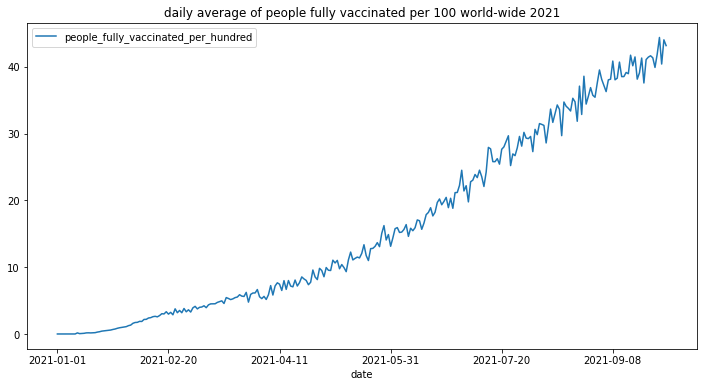

In [4]:

df_bydate_vac = df_thisyear.groupby('date')[['date','people_fully_vaccinated_per_hundred']].mean()
df_bydate_vac = df_bydate_vac[:-1] 

myplot2 = df_bydate_vac.plot(kind='line');

plt.title('daily average of people fully vaccinated per 100 world-wide 2021');

plt.gcf().set_size_inches(12, 6);
plt.show(myplot2);

### Previous Year

There are no similar seasonal patterns observed world-wide, instead, steady climb to explosion during 2020
Also it is noticable, sometime around 2020 summer looks like Delta variant exploded and new_case number increased double and over

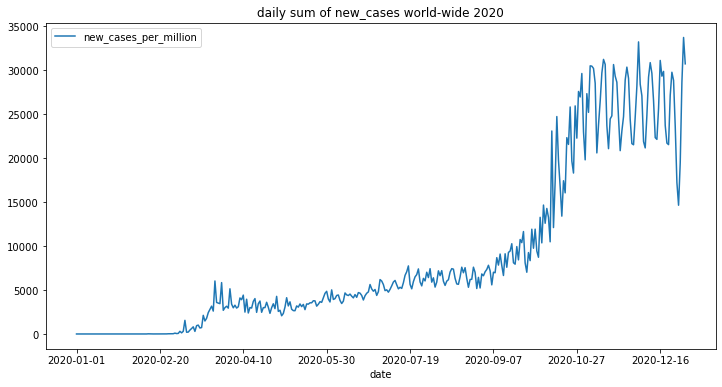

In [5]:
df_covid['year'] = df_covid['date'].apply(lambda x: x[:4])
df_lastyear = df_covid[df_covid.year == '2020']
df_lbydate = df_lastyear.groupby('date')[['date', 'new_cases_per_million']].sum()
df_lbydate.plot(kind='line');
plt.title('daily sum of new_cases world-wide 2020');

plt.gcf().set_size_inches(12, 6);

### NEXT checking on new_cases_per_million and people_fully_vaccinated_per_hundred

fully vaccination rate goes up new cases generally goes down... apart from some outlier flare ups

Note above 80/100 vaccination rate, is is celar that new cases are suppressed low

### close-up around 80/100 vaccine cover and even closer...

Closed up look around 80/100 fully vaccinated above 70, new_cases are suppressed under 800/day, above 80, under 200/day

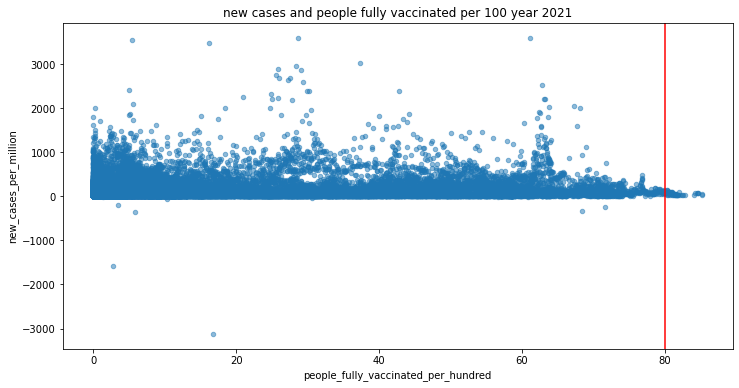

In [6]:
df_thisyear.plot(kind='scatter',y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', alpha=0.5);
plt.title('new cases and people fully vaccinated per 100 year 2021');
plt.axvline(x=80, color='red');
plt.gcf().set_size_inches(12, 6);

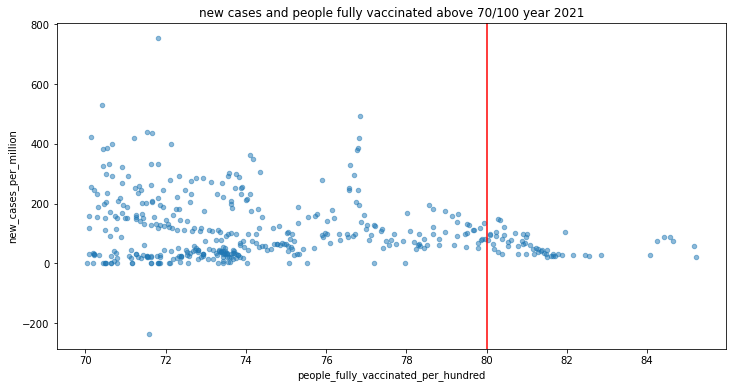

In [7]:
df_thisyear[df_thisyear.people_fully_vaccinated_per_hundred >= 70].plot(kind='scatter',y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', alpha=0.5);
plt.title('new cases and people fully vaccinated above 70/100 year 2021');
plt.axvline(x=80, color='red');
plt.gcf().set_size_inches(12, 6);


### More close-up data ... from 2021 September to 3rd October

Go-ing down 

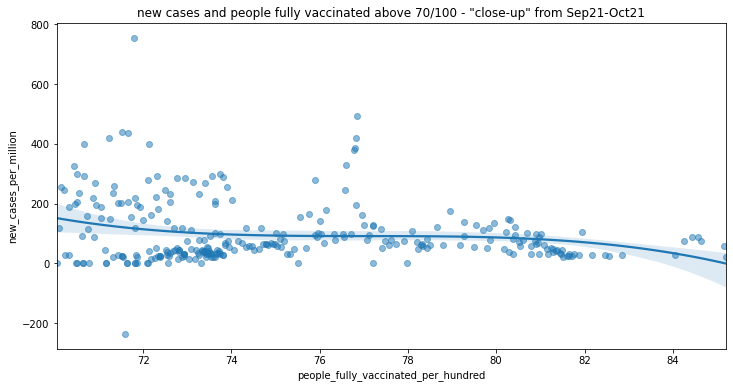

In [8]:
#more close-up data .. from 2021 September to 3rd October
#df_thisyear[df_thisyear.ndate >= '2021-09-01'].query('people_fully_vaccinated_per_hundred >=70').plot(kind='scatter', y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', alpha=0.5)
plt.show();
sb.regplot(data = df_thisyear[df_thisyear.ndate >= '2021-09-01'].query('people_fully_vaccinated_per_hundred >=70'), y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', scatter_kws={'alpha':0.5}, fit_reg = True, order=3);
plt.title('new cases and people fully vaccinated above 70/100 - "close-up" from Sep21-Oct21');
plt.gcf().set_size_inches(12, 6);


### Curious upsurges....

Vaccine works!
impact = death toll impact
Looks like all well suppressed of new_cases above 60/100, however, what about this curious upsurge against negative co-relationship trend?

### Upsurge of the new_cases --- diabetes_prevalence

#### Upsurge in green

Diabetic_level high group is having upward trend... against other groups trending down

Upsurge is due to diabetic=high, older_generation=moderate-mixed, smoker=low, therefore it is safe to say diabetic level is a factor strongly affecting new_cases upsurge

This means middle aged smokers with diabetes are more at risk.... like Boris Johnson ??

Around 76/100 fully vaccinated, clear upsurge in green observed, needing more investigation

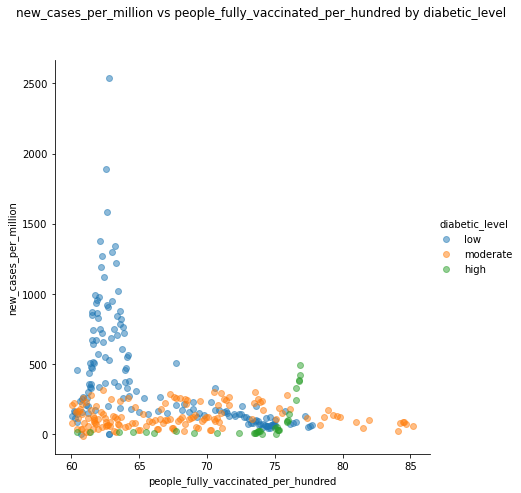

In [9]:

df_thisyear.total_deaths_per_million.describe()
bin_edges=[36.24, 238.50, 1002.80, 6000]
bin_names=['very low', 'low', 'high']
df_thisyear['impact'] = pd.cut(df_thisyear['total_deaths_per_million'], bin_edges, labels = bin_names)
df_thisyear['impact'].value_counts()

df_thisyear.diabetes_prevalence.describe()
be_diabetes = [5.31, 7.20, 10.43,35.00]
bn_diabetes = ['low','moderate', 'high']
df_thisyear['diabetic_level'] = pd.cut(df_thisyear['diabetes_prevalence'], be_diabetes, labels = bn_diabetes)
df_thisyear['diabetic_level'].value_counts()

df_thisyear.aged_65_older.describe()
be_65plus = [3.46, 6.22, 13.93, 28]
bn_65plus = ['younger', 'moderate-mixed', 'older']
df_thisyear['older_population'] = pd.cut(df_thisyear['aged_65_older'], be_65plus, labels=bn_65plus)
df_thisyear['older_population'].value_counts()

df_thisyear.cardiovasc_death_rate.describe()
be_cardio = [171.29, 243.96, 333.43, 724.42]
bn_cardio = ['low', 'moderate', 'high']
df_thisyear['cardio_death_no'] = pd.cut(df_thisyear['cardiovasc_death_rate'], be_cardio, labels=bn_cardio)

df_thisyear.male_smokers.describe()
be_smokers = [21.60, 33.10, 41.30, 80.00]
bn_smokers = ['low', 'moderate', 'high']
df_thisyear['smokers-men']=pd.cut(df_thisyear['male_smokers'], be_smokers, labels=bn_smokers)

df_thisyear['month'] = df_thisyear['date'].apply(lambda x: x.__str__()[5:7])

df_new = df_thisyear[df_thisyear.icu_patients.notna()].query('people_fully_vaccinated_per_hundred > 60')



g = sb.lmplot(data=df_new, y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', hue='diabetic_level', fit_reg = False, scatter_kws={'alpha':0.5}, height=6, aspect=1);
g.fig.suptitle('new_cases_per_million vs people_fully_vaccinated_per_hundred by diabetic_level', y=1.1);
plt.show();


### Diabetic Level and cardio mortality level combo -- new trend at 30/100 and 40/100 ***

this combo is showing few curious upward surges strongly than 70/100 upsurge (Boris Johnson curve)

This trend group is having cardio-high/diabetic-moderate combination

Also this combination is lower in vaccine level, below 60 comare to other groups being 80 and above


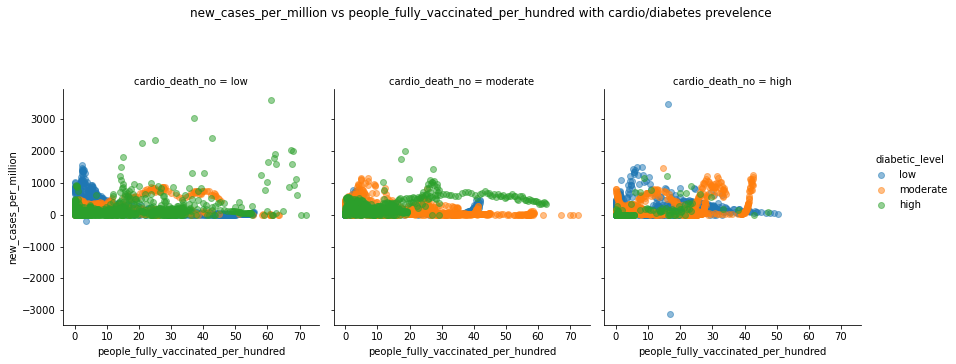

In [10]:
df_cardio = df_thisyear[['new_cases_per_million','people_fully_vaccinated_per_hundred','diabetic_level','older_population','cardio_death_no']].dropna()



g = sb.lmplot(data = df_cardio, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million',hue='diabetic_level', col='cardio_death_no', fit_reg=False, scatter_kws={'alpha':0.5}, height=4, aspect=1);

g.fig.suptitle('new_cases_per_million vs people_fully_vaccinated_per_hundred with cardio/diabetes prevelence', y=1.2);
plt.show();

sb.set(font_scale = 2)

### Multiple Whammy + smoking...
 
could this be adverse effect of vaccine or new variant's emerging ? Could this be people refrained from taking vaccines with medical advises?

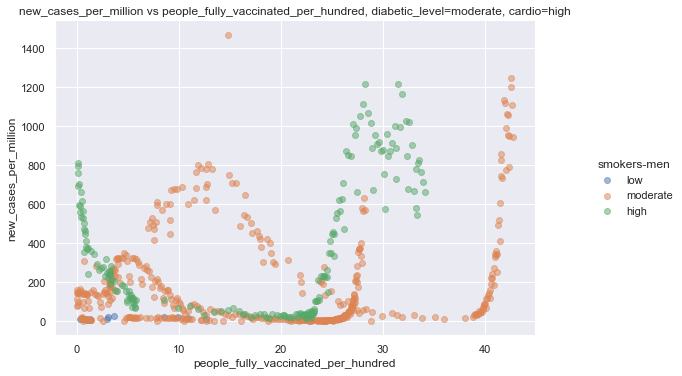

In [12]:
#close up of the curious combination of cardio-high/diabetic-moderate
df_spikers= df_thisyear[df_thisyear.diabetic_level=="moderate"].query('cardio_death_no =="high"')
plt.show();

g = sb.lmplot(data = df_spikers, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million', hue = 'smokers-men', fit_reg=False, scatter_kws={'alpha':0.5});
ax=plt.gca();
ax.set_title('new_cases_per_million vs people_fully_vaccinated_per_hundred, diabetic_level=moderate, cardio=high');
plt.gcf().set_size_inches(10, 5);

sb.set(font_scale=1);

### Multiple Whammy group at a glance

In [13]:
df_nastyspike = df_spikers.query('new_cases_per_million > 100')
df_nastyspike.groupby('location')[['location','total_deaths_per_million', 'hospital_beds_per_thousand','tests_per_case','positive_rate','median_age' ,'life_expectancy','aged_65_older']].mean()

,total_deaths_per_million,hospital_beds_per_thousand,tests_per_case,positive_rate,median_age,life_expectancy,aged_65_older
location,,,,,,,
Libya,462.430933,3.700,NaN,NaN,29.0,72.91,4.424
Montenegro,2122.394444,3.861,NaN,NaN,39.1,76.88,14.762
Romania,1252.511588,6.892,9.062205,0.124142,43.0,76.05,17.850
Serbia,831.643005,5.609,5.572131,0.207481,41.2,76.00,17.366


### Location of Multiple Whammies

<img src="./Screen Shot 2021-10-16 at 8.33.32.png">

### Even more close-up of upwards trend, limiting to 200+ new cases

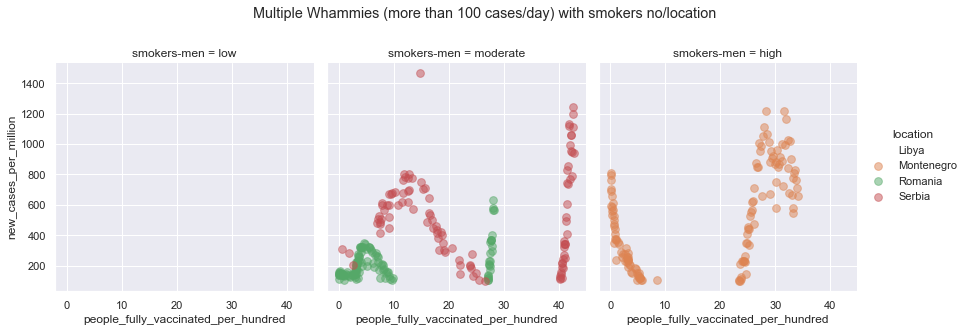

In [14]:
# even more close-up of upwards data more than 100 new cases....

g = sb.lmplot(data = df_nastyspike, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million', col='smokers-men', hue = 'location', fit_reg=False, scatter_kws={'s':60,'alpha':0.5}, height=4, aspect=1);
df_nastyspike[['location','total_deaths_per_million']].groupby('location').mean()
g.fig.suptitle('Multiple Whammies (more than 100 cases/day) with smokers no/location', y=1.1);
plt.show();


### investigating on nasty spikes new_cases_per_million more than 100 

Observed nasty spike data are originated in the neighbourhood region of Romania, Serbia, Montenegro, Libya

Referencing on google map to see how closely they are located, except Libya on the other side of the African continent

They share moderate to high cardio, diabetes and smoking habit

I wonder if these upward trend could be due to having new variants, adverse effect from vaccine or FIFAe World Cup succor match clusters,  even possibly manual workers/track drivers came home from EU ??

Afghanistan and Uzubekistan could be in the same situation but escaped by having younger population


### Reverse trend in central Balkan 2021

Upsurge is happening NOW despite vaccines --- focusing on new_cases 

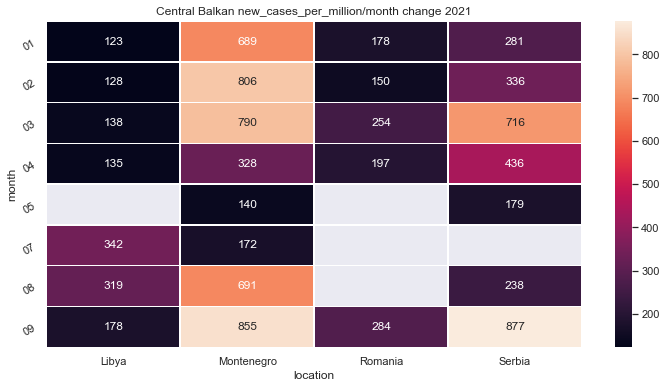

In [15]:

df_newmap = df_nastyspike.groupby(['location', 'month'])['new_cases_per_million'].mean()

df_newmap = df_newmap.reset_index()
df_newmap.new_cases_per_million.astype('int64')

newmap = df_newmap.pivot('month', 'location', 'new_cases_per_million')

#dropping october data as it only contains 3 days worth
newmap = newmap.iloc[0:-1]

f, ax = plt.subplots(figsize=(9, 6));
sb.heatmap(newmap, annot=True, fmt=".0f", linewidths=.5, ax=ax);
plt.yticks(rotation=30);
ax.set_title('Central Balkan new_cases_per_million/month change 2021');
plt.gcf().set_size_inches(12, 6);
plt.show();

### Reverse upward trend in central Balkan 2021

Upsurge is happening NOW despite vaccines --- focusing on new_deaths 

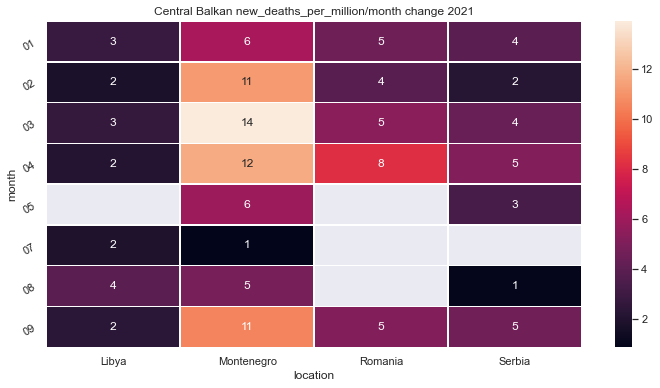

In [16]:

df_newmap2 = df_nastyspike.groupby(['location', 'month'])['new_deaths_per_million'].mean()

df_newmap2 = df_newmap2.reset_index()
df_newmap2.new_deaths_per_million.astype('int64')

newmap2 = df_newmap2.pivot('month', 'location', 'new_deaths_per_million')

#dropping october data as it only contains 3 days worth
newmap2 = newmap2.iloc[0:-1]

f, ax = plt.subplots(figsize=(9, 6));
sb.heatmap(newmap2, annot=True, fmt=".0f", linewidths=.5, ax=ax);
plt.yticks(rotation=30);
ax.set_title('Central Balkan new_deaths_per_million/month change 2021');
plt.gcf().set_size_inches(12, 6);
plt.show();

### Full Vaccination rate goes up, new_cases goes down except....

High Cardio mortality, moderate diabetic levels, older age, and smoking moderate - high

Generally there were negative co-relationship between people_fully_vaccinated_per_hundred and new_cases_per_million, showing vaccination rate goes up, new_cases goes down however there were some upsurge in Central Balkan

### Quad whammy found!
Not only diabetic_prevalence, also cardiovasc_death_rate, age and smoker numbers strongly affected of jumping surge of new_cases to the point of being reverse trend despite vaccines

Reverse trend was localized in area of Romania, Serbia, Montenegro and Libya

For Reverse trend group, full vaccination rate remained around 40/100 to this date

In [ ]:
!jupyter nbconvert slide_deck_covid19JO.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_covid19JO.ipynb to slides
[NbConvertApp] Writing 1243529 bytes to slide_deck_covid19JO.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_covid19JO.slides.html
Use Control-C to stop this server
